# Practical example of Linear Regression in sklearn

In this notebook I demonsrate the use of sklearns LinearRegression class on a car sales dataset.

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

To simplify the model we will not include car `Model` 

In [4]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

While not really recommended, we will drop the missing values here - they account for <5% of the data.

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no_mv = data.dropna(axis=0)

In [7]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

<AxesSubplot:xlabel='Price', ylabel='Count'>

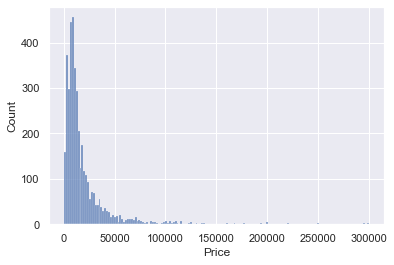

In [8]:
sns.histplot(data_no_mv['Price'])

### Dealing with outliers

There appear to be some outliers in the `Price` column. One simple way of dealing with this is to remove 0.5% or 1% of the data, in this case from the high price side of the graph. We then do the ame with the `Mileage`, `EngineV` and `Year` columns.

In [9]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<AxesSubplot:xlabel='Price', ylabel='Count'>

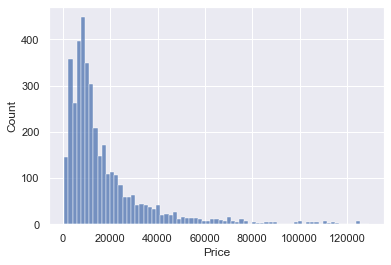

In [10]:
sns.histplot(data_1['Price'])

#### Mileage

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

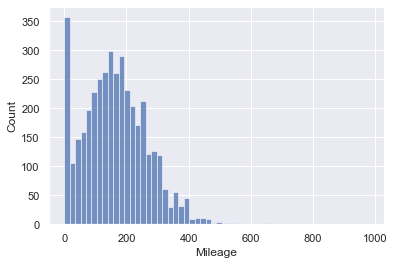

In [11]:
sns.histplot(data_no_mv['Mileage'])

In [12]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

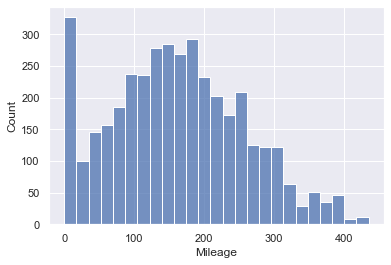

In [13]:
sns.histplot(data_2['Mileage'])

#### Engine volume

<AxesSubplot:xlabel='EngineV', ylabel='Count'>

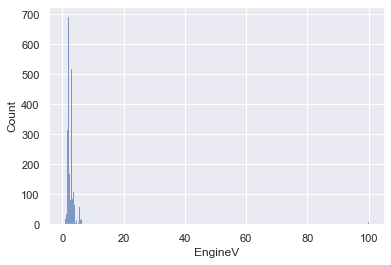

In [14]:
sns.histplot(data_no_mv['EngineV'])

For the `EngineV` data we can restrict the data to sensible engine sizes, as even the most powerful supercars rarely have sizes above 8l.

In [15]:
data_3 = data_2[data_2['EngineV']<8]

<AxesSubplot:xlabel='EngineV', ylabel='Count'>

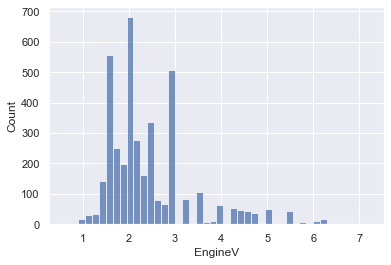

In [16]:
sns.histplot(data_3['EngineV'])

#### Year

<AxesSubplot:xlabel='Year', ylabel='Count'>

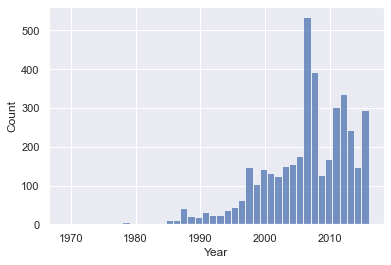

In [17]:
sns.histplot(data_no_mv['Year'])

In [18]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

<AxesSubplot:xlabel='Year', ylabel='Count'>

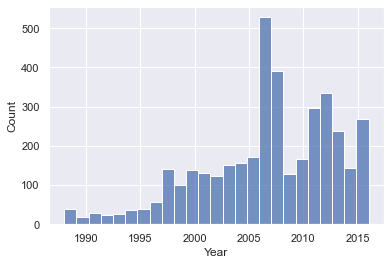

In [19]:
sns.histplot(data_4['Year'])

In [20]:
data_cleaned = data_4.reset_index(drop=True)

In [21]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3869,3869.000000,3869,3869.000000,3869.000000,3869,3869,3869.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1469,NaN,NaN,1807,3507,NaN
mean,NaN,18196.862267,NaN,160.532437,2.452714,NaN,NaN,2006.711295
std,NaN,19083.381768,NaN,95.610571,0.954409,NaN,NaN,6.102717
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions

We now look at some relationships between features and `Price` to make sure things are behaving.

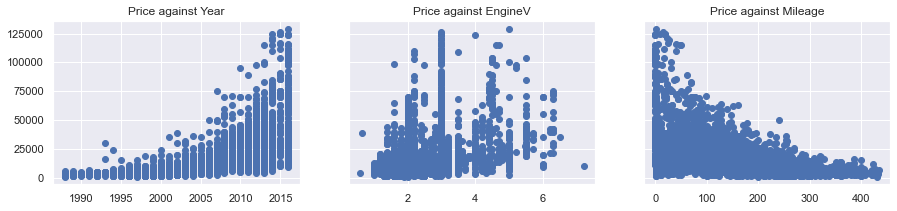

In [60]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price against Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price against EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price against Mileage')


plt.show()

There seems to be an exponential relationship at work here so we can try to take a log transform of the price data.

<AxesSubplot:xlabel='Price', ylabel='Count'>

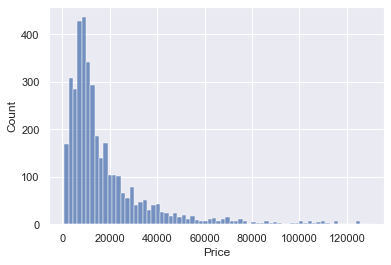

In [23]:
sns.histplot(data_cleaned['Price'])

<AxesSubplot:xlabel='Price', ylabel='Count'>

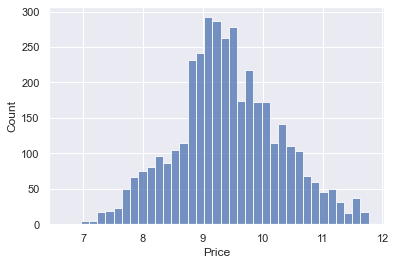

In [24]:
sns.histplot(np.log(data_cleaned['Price']))

### Relaxing the assumptions

In [62]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81


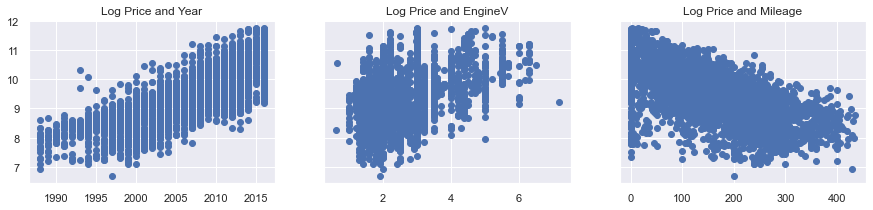

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

This looks much more linear, especially for the `Year` data.

In [27]:
data_log_price = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

We can check for multicollinearity by calculating the variance inflation factor for the numerical variables.

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_log_price[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [30]:
vif

,VIF,features
0,3.792512,Mileage
1,10.303342,Year
2,7.604155,EngineV


In [83]:
data_no_multicollinearity = data_log_price.drop(['EngineV'],axis=1)

## Create dummy variables

In [84]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [85]:
data_with_dummies.head()

,Mileage,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,1991,8.34,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,1999,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,2003,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,2007,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2011,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit

In [86]:
data_with_dummies.columns.values

array(['Mileage', 'Year', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes'], dtype=object)

In [87]:
cols = ['log_price', 'Mileage', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [88]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.97,427,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.50,358,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.04,240,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.81,120,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model

### Declare the inputs and the targets

In [89]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [91]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [92]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [93]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [94]:
y_hat = reg.predict(x_train)

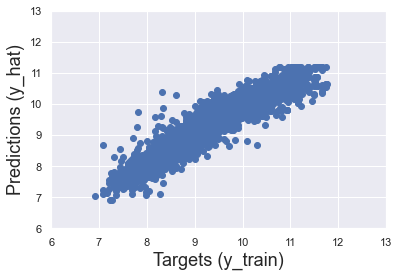

In [95]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

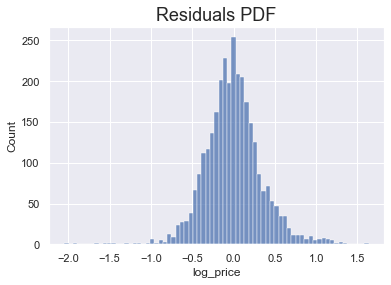

In [96]:
sns.histplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [97]:
reg.score(x_train,y_train)

0.8459663279715576

In [98]:
reg.score(x_test, y_test)

0.8463014648227124

### Finding the weights and bias

In [99]:
reg.intercept_

9.419593756528815

In [100]:
reg.coef_

array([-0.09802653,  0.49855814,  0.0334914 ,  0.03568909, -0.17286329,
       -0.25236804, -0.08105605, -0.15065513, -0.17301191, -0.11733595,
       -0.23028697, -0.16000381, -0.23074658, -0.02483039, -0.01362969,
       -0.04445334,  0.26114999])

In [101]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.10
1,Year,0.50
2,Brand_BMW,0.03
3,Brand_Mercedes-Benz,0.04
4,Brand_Mitsubishi,-0.17
5,Brand_Renault,-0.25
6,Brand_Toyota,-0.08
7,Brand_Volkswagen,-0.15
8,Body_hatch,-0.17
9,Body_other,-0.12


In [102]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [103]:
y_hat_test = reg.predict(x_test)

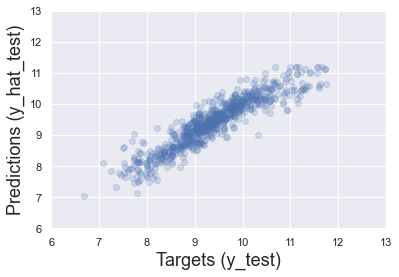

In [104]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [105]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,20869.67
1,15678.94
2,1820.98
3,63023.76
4,16312.46


In [106]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,20869.67,NaN
1,15678.94,7900.00
2,1820.98,NaN
3,63023.76,NaN
4,16312.46,NaN
...,...,...
769,28551.48,6950.00
770,12792.55,NaN
771,21601.05,NaN
772,5745.96,NaN


In [107]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    9.99
1    9.74
2    7.82
3   10.97
4    9.21
Name: log_price, dtype: float64

In [108]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,20869.67,21900.00
1,15678.94,16999.00
2,1820.98,2500.00
3,63023.76,58000.00
4,16312.46,10000.00
...,...,...
769,28551.48,25500.00
770,12792.55,13300.00
771,21601.05,14500.00
772,5745.96,5200.00


In [109]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [110]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,20869.67,21900.00,1030.33,4.70
1,15678.94,16999.00,1320.06,7.77
2,1820.98,2500.00,679.02,27.16
3,63023.76,58000.00,-5023.76,8.66
4,16312.46,10000.00,-6312.46,63.12
...,...,...,...,...
769,28551.48,25500.00,-3051.48,11.97
770,12792.55,13300.00,507.45,3.82
771,21601.05,14500.00,-7101.05,48.97
772,5745.96,5200.00,-545.96,10.50


In [111]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,16061.39,17490.17,1428.79,26.88
std,13037.20,19041.52,10698.39,28.21
min,1117.48,800.00,-29864.72,0.00
25%,6878.93,6824.75,-2334.20,8.85
50%,12388.78,11400.00,-358.85,18.66
75%,21280.55,19875.00,1509.37,35.74
max,73027.97,126000.00,84768.08,261.74


In [112]:

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
345,12949.51,12950.00,0.49,0.00
258,13989.48,13999.00,9.52,0.07
208,5487.49,5500.00,12.51,0.23
442,29892.36,29999.00,106.64,0.36
218,22394.97,22500.00,105.03,0.47
...,...,...,...,...
245,10019.53,3650.00,-6369.53,174.51
291,5252.51,1800.00,-3452.51,191.81
630,5521.81,1850.00,-3671.81,198.48
356,6661.90,2200.00,-4461.90,202.81
